<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno: Raul Pichinin

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 2\. AWS SageMaker

2.1- Criando um bucket no AWS S3;

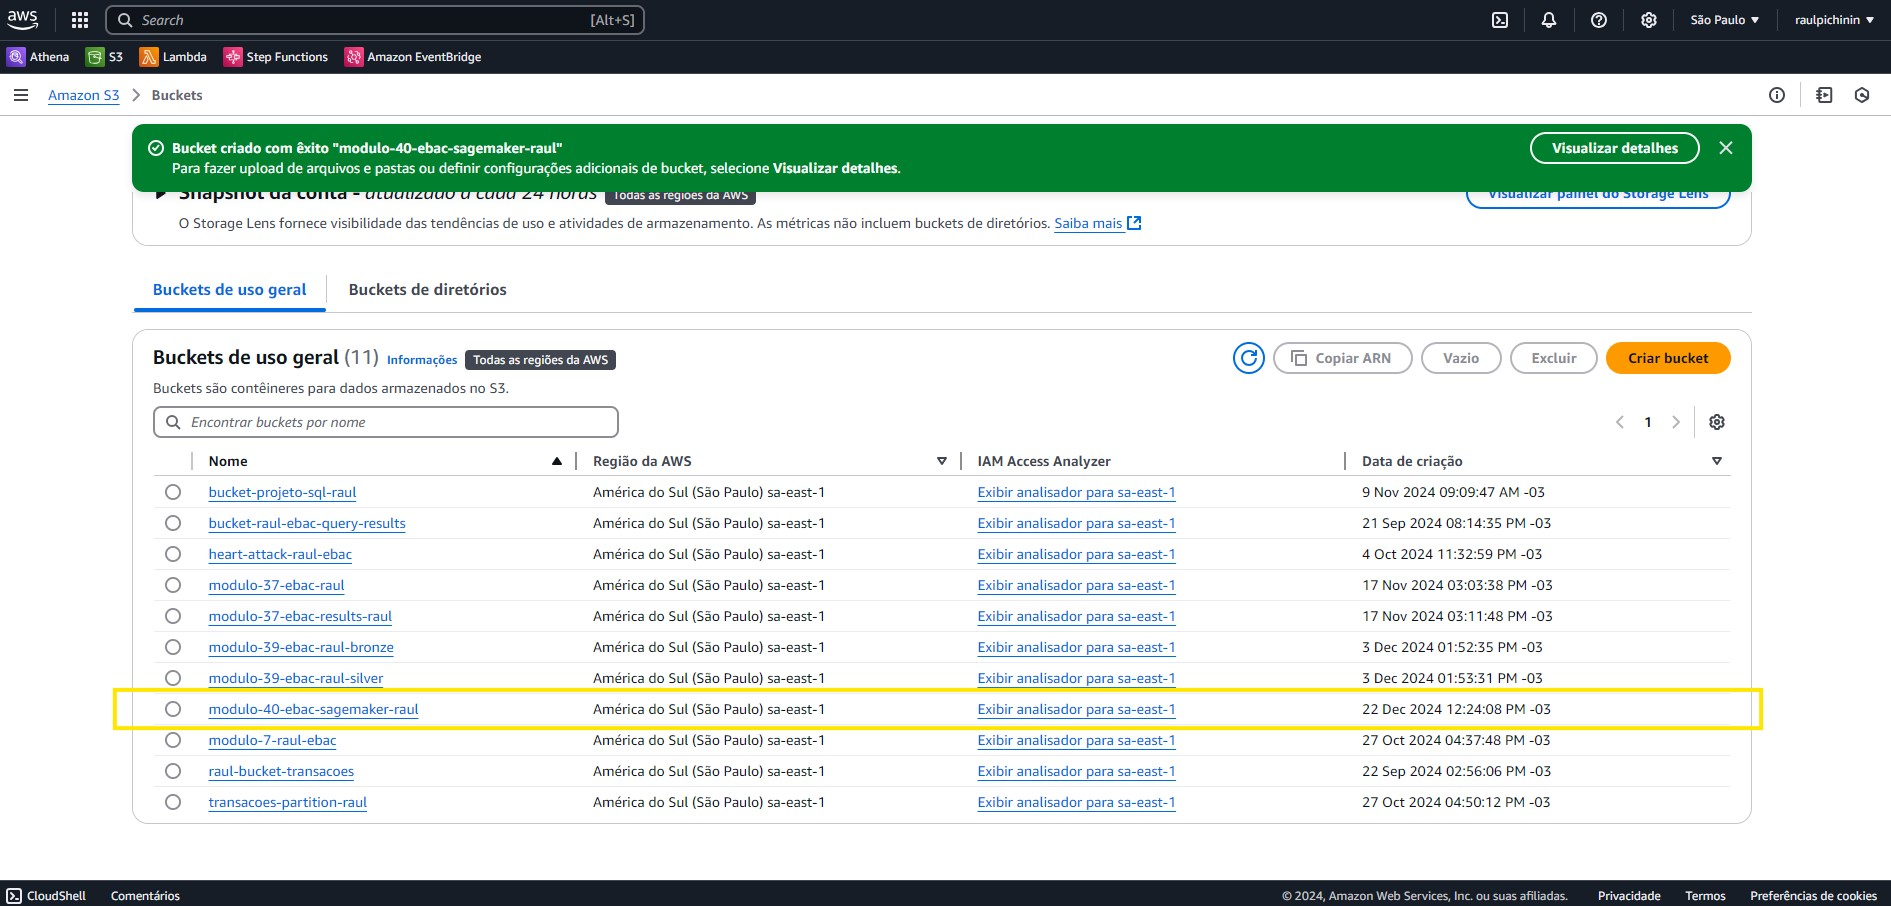

2.2- Fazendo o upload de um objeto no bucket do AWS S3;

In [ ]:
%%writefile cotacao.csv
date,usd,eur,gbp
2021-01-21,5.4582,6.1896,7.3980
2021-01-20,5.4191,6.1290,7.3673
2021-01-19,5.4383,6.1676,7.3994
2021-01-18,5.5666,6.3042,7.5672

Writing cotacao.csv


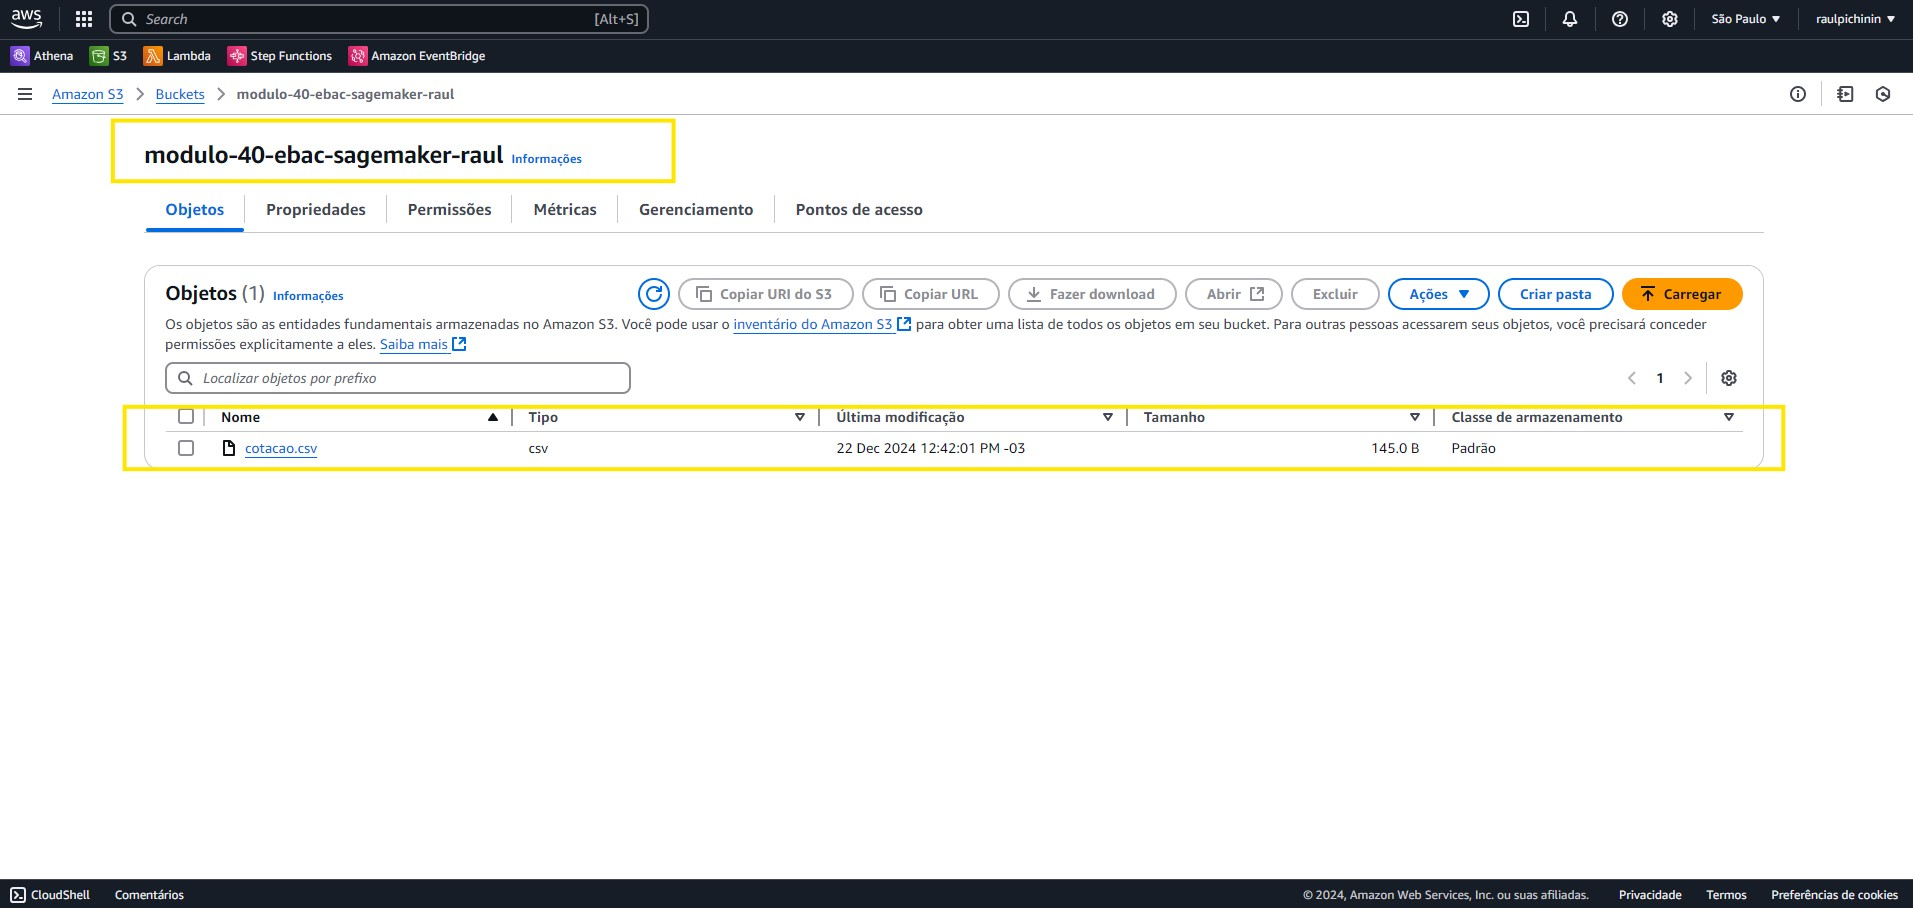

2.3- Crie um notebook no AWS SageMaker;

2.3.1 - Criando Instância;

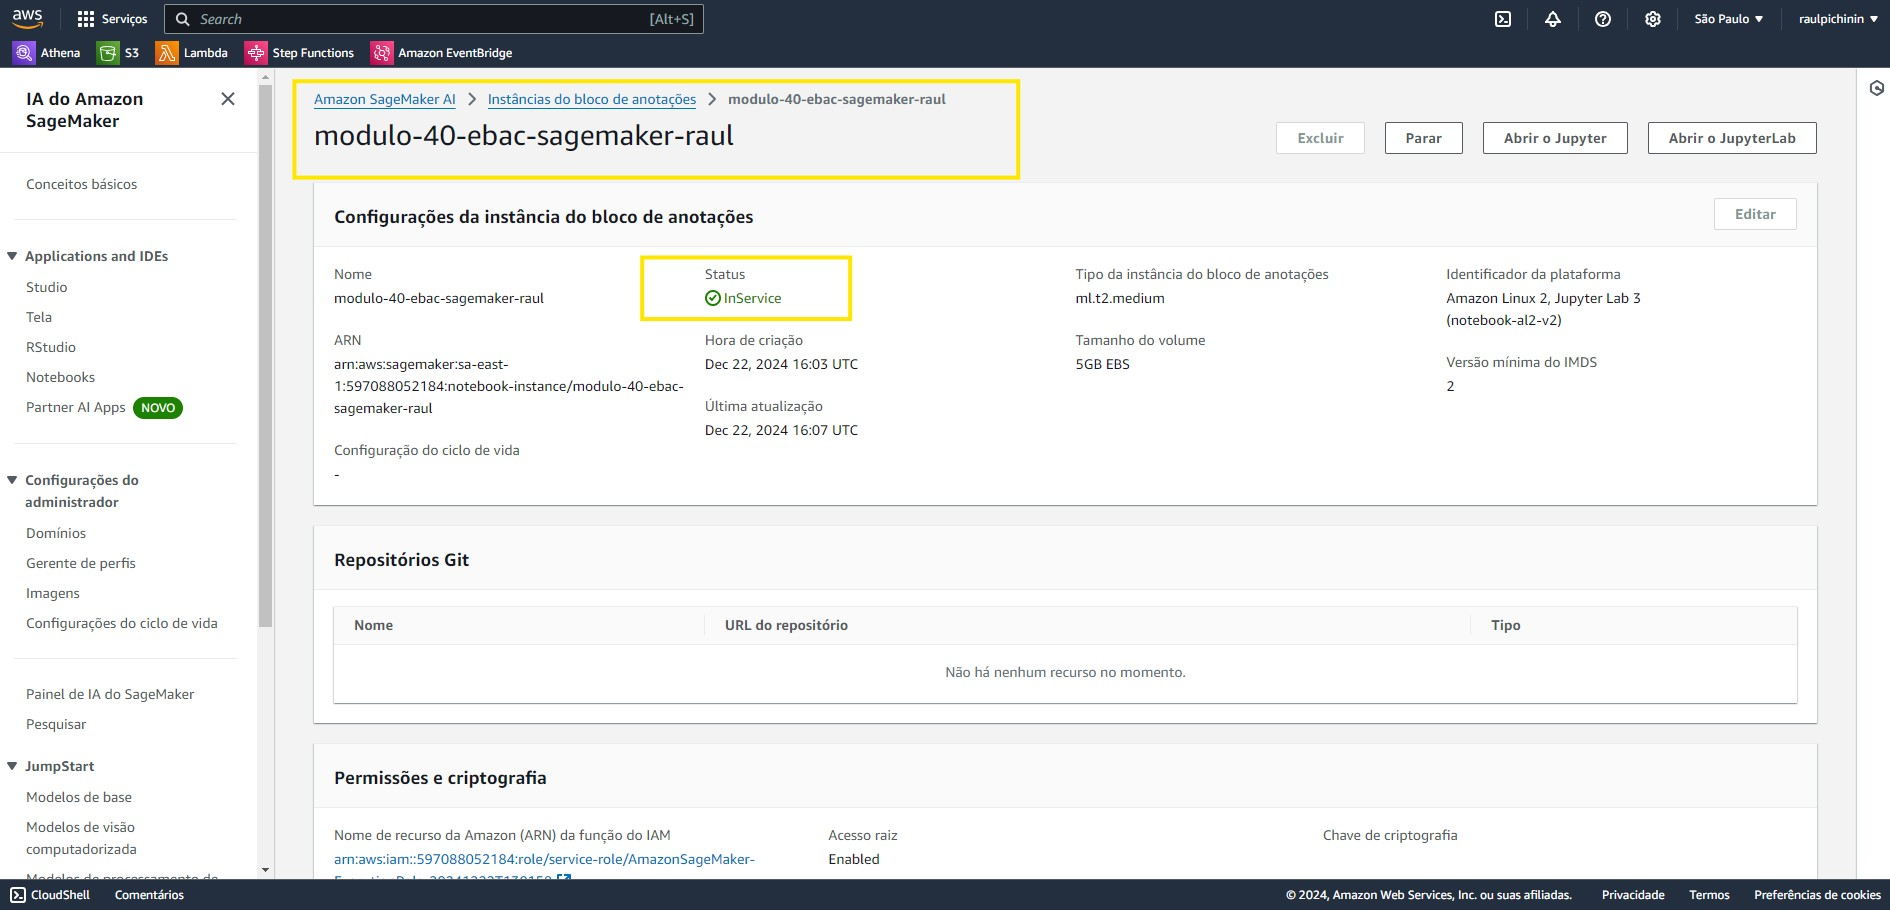

2.3.2 - Carregando notebook;

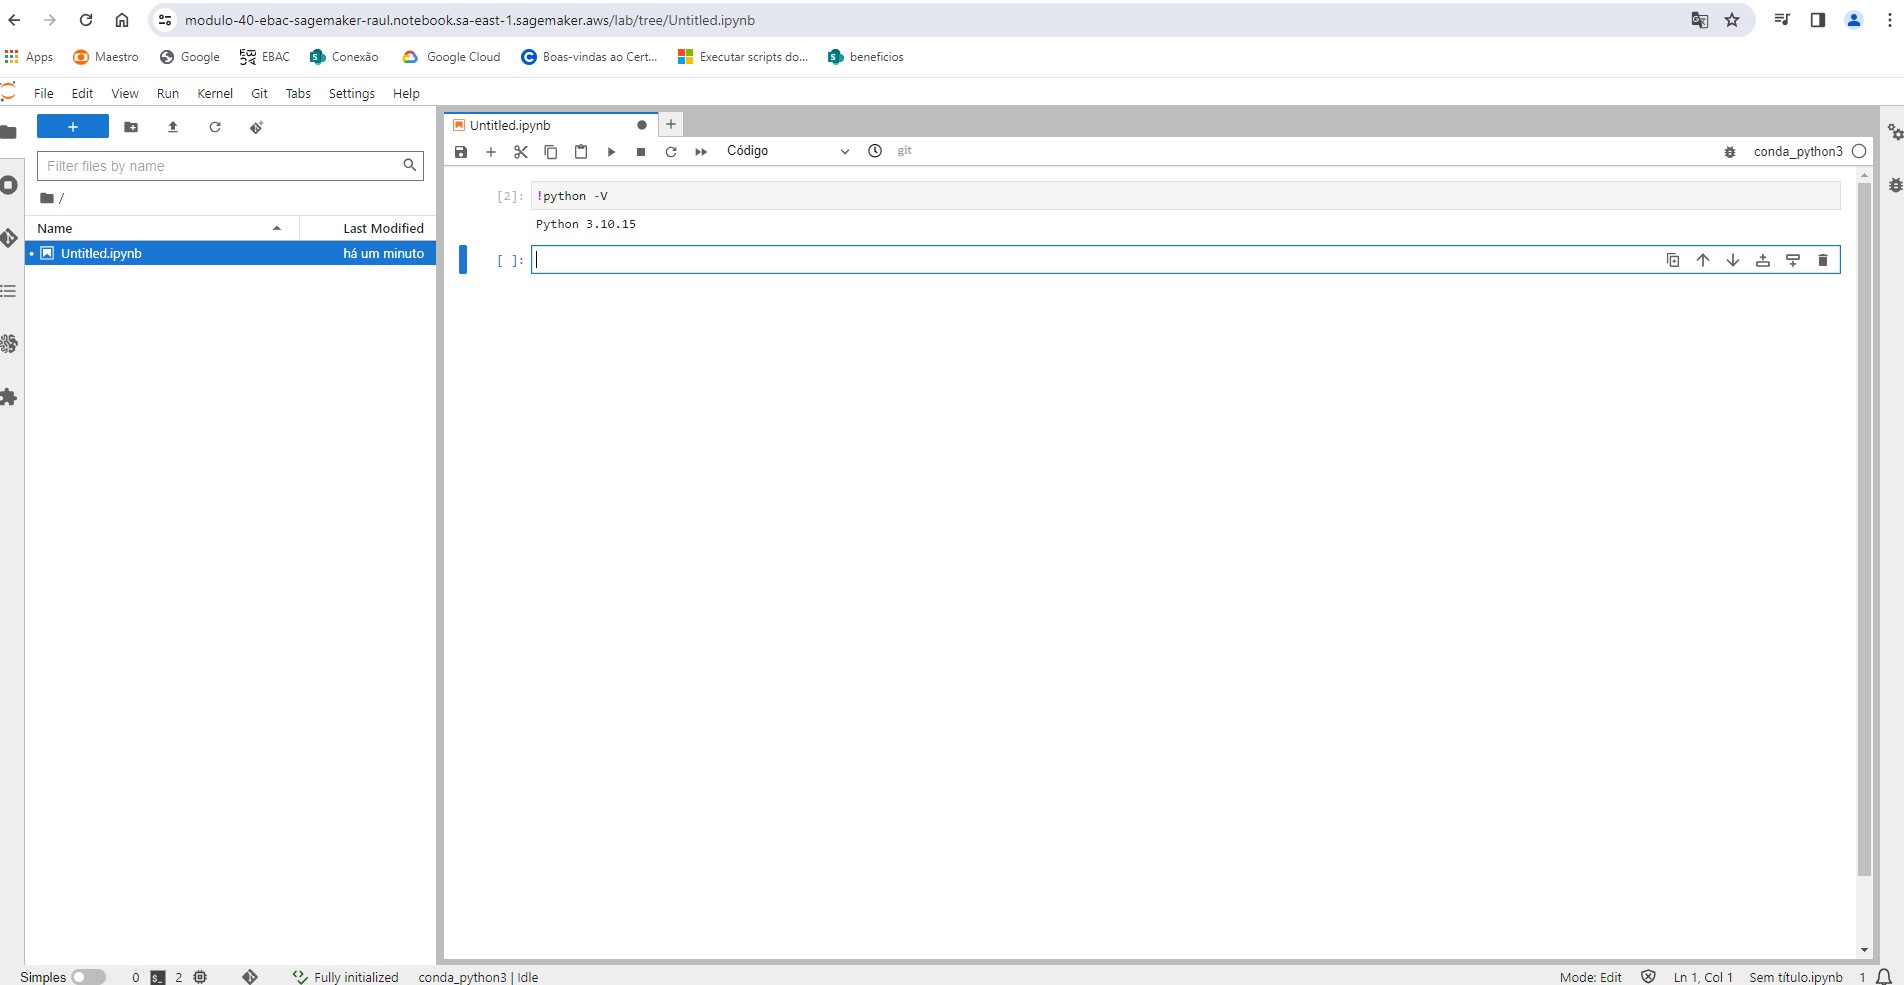

2.3.3 - Carregando o objeto do bucket do AWS S3 no notebook;

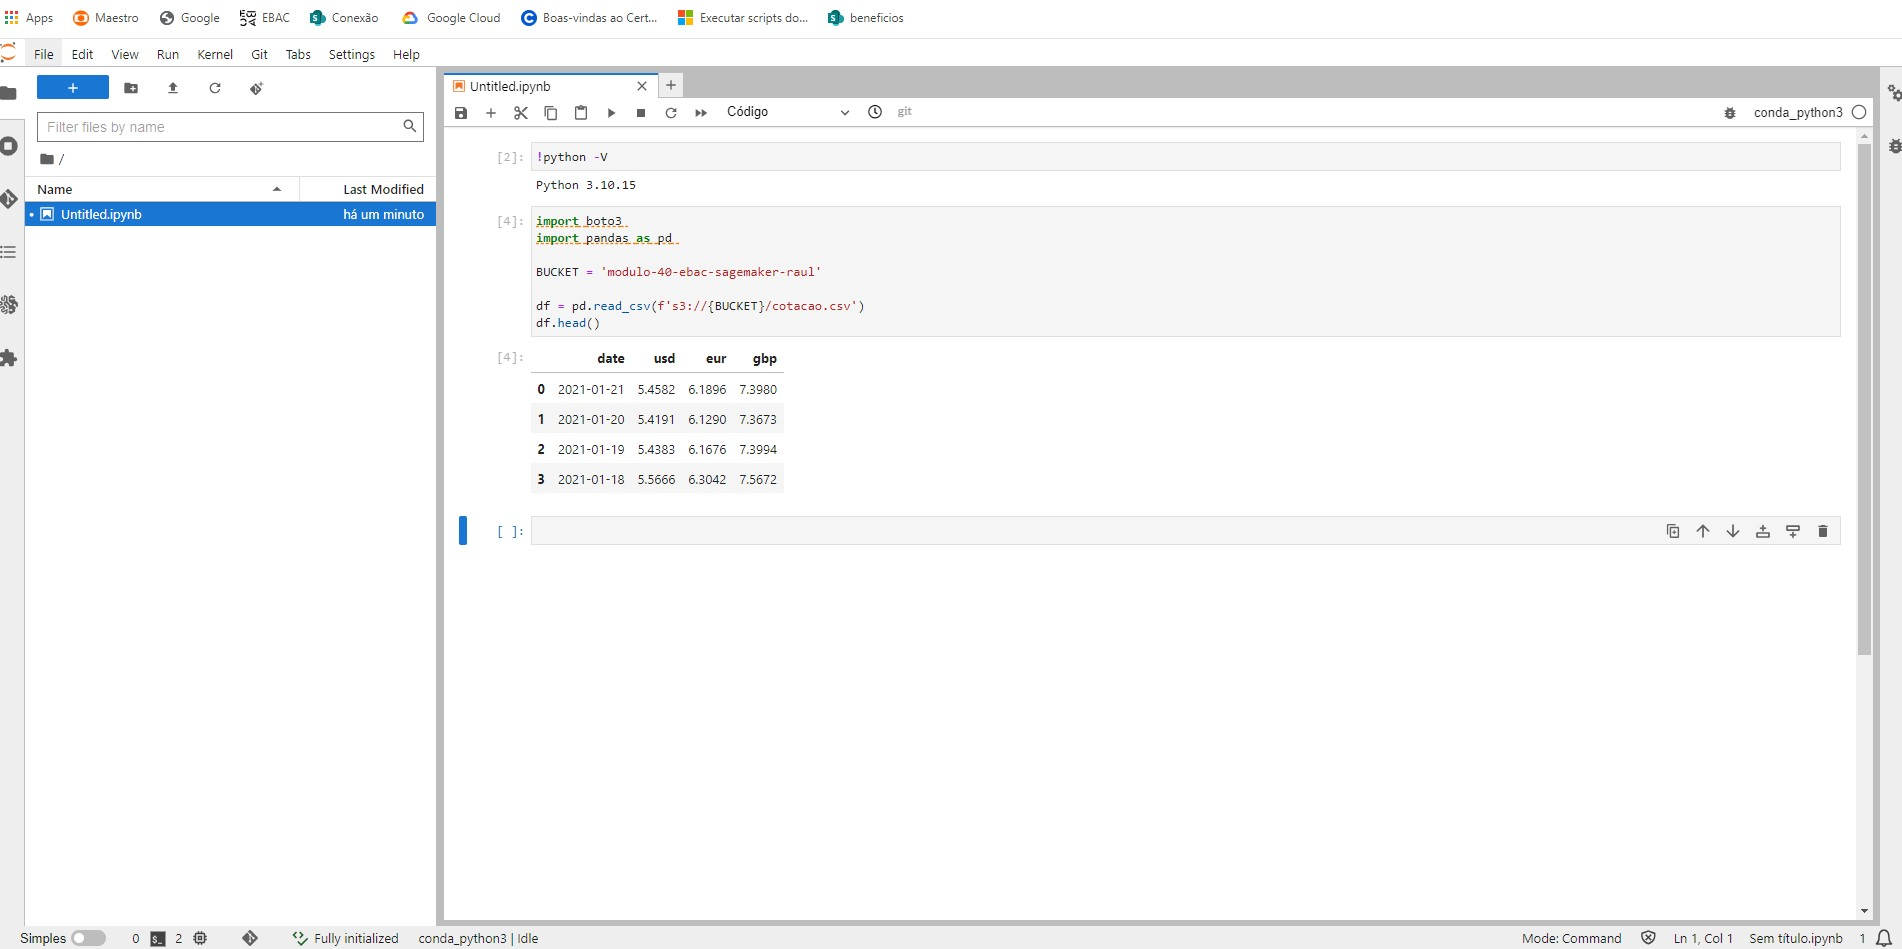

2.3.4 - Desligando a instância do AWS EC2 do notebook;

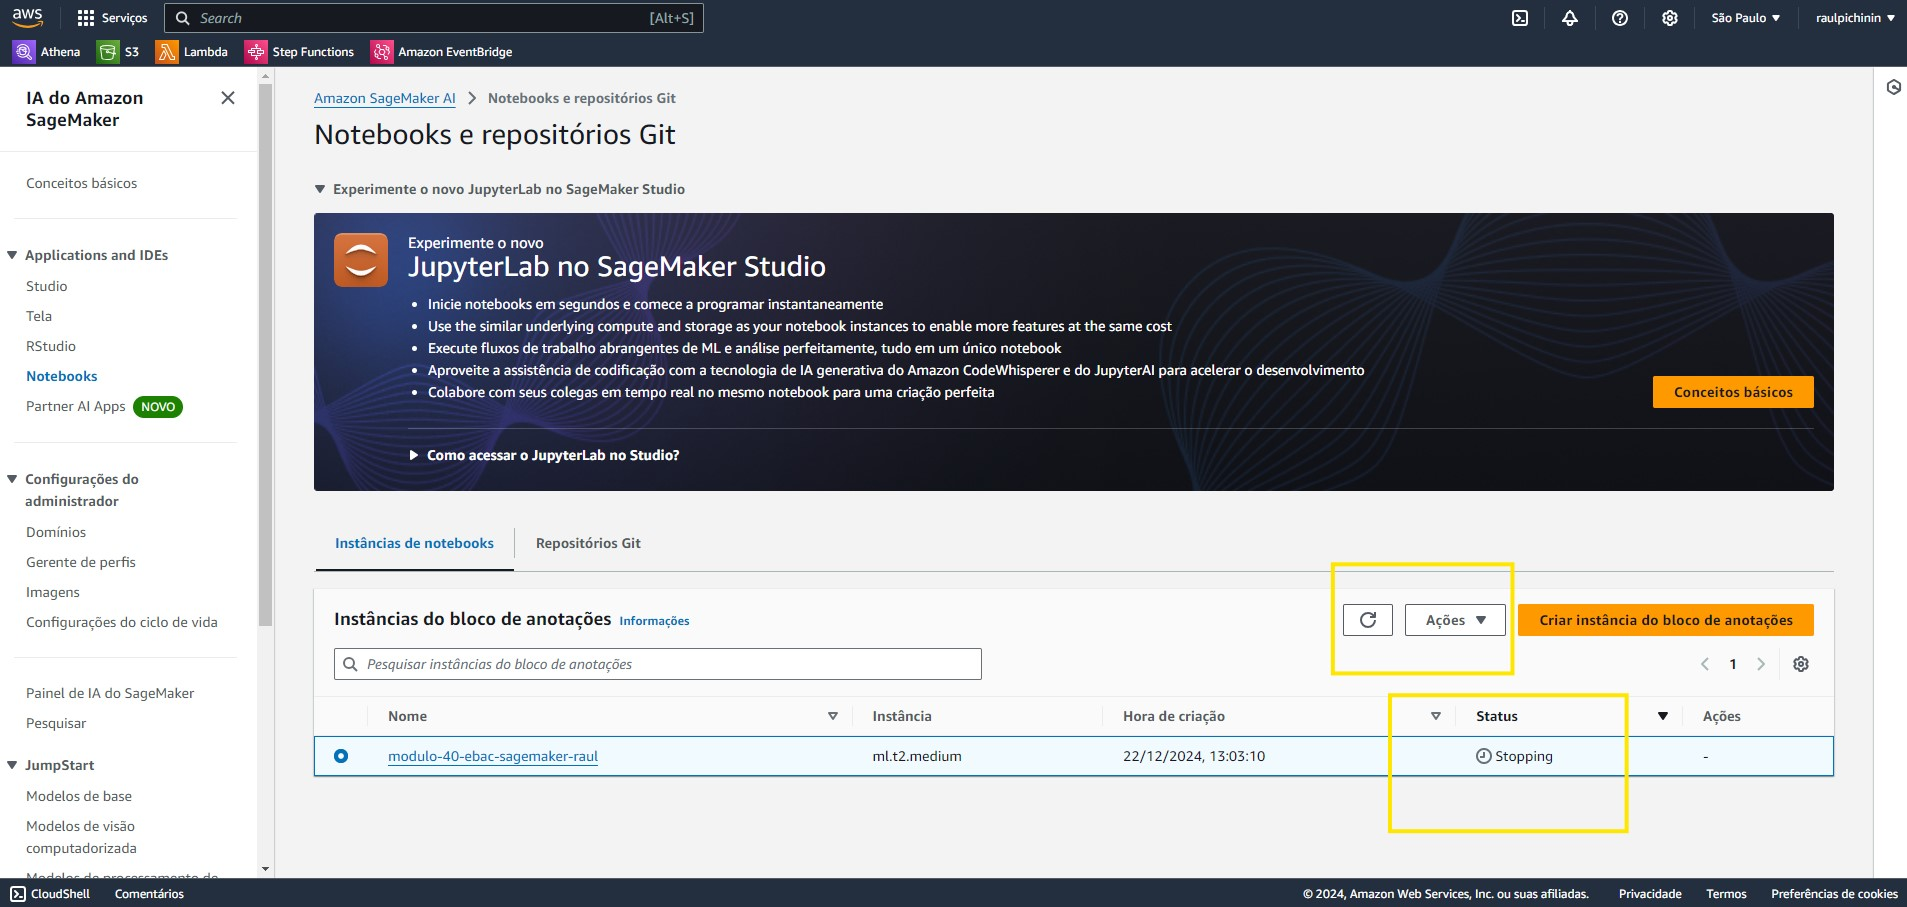

## 3\. AWS Acesso Externo

3.1- Criando um usuário programático no AWS IAM e adicionando política de leitura em buckets do AWS S3;

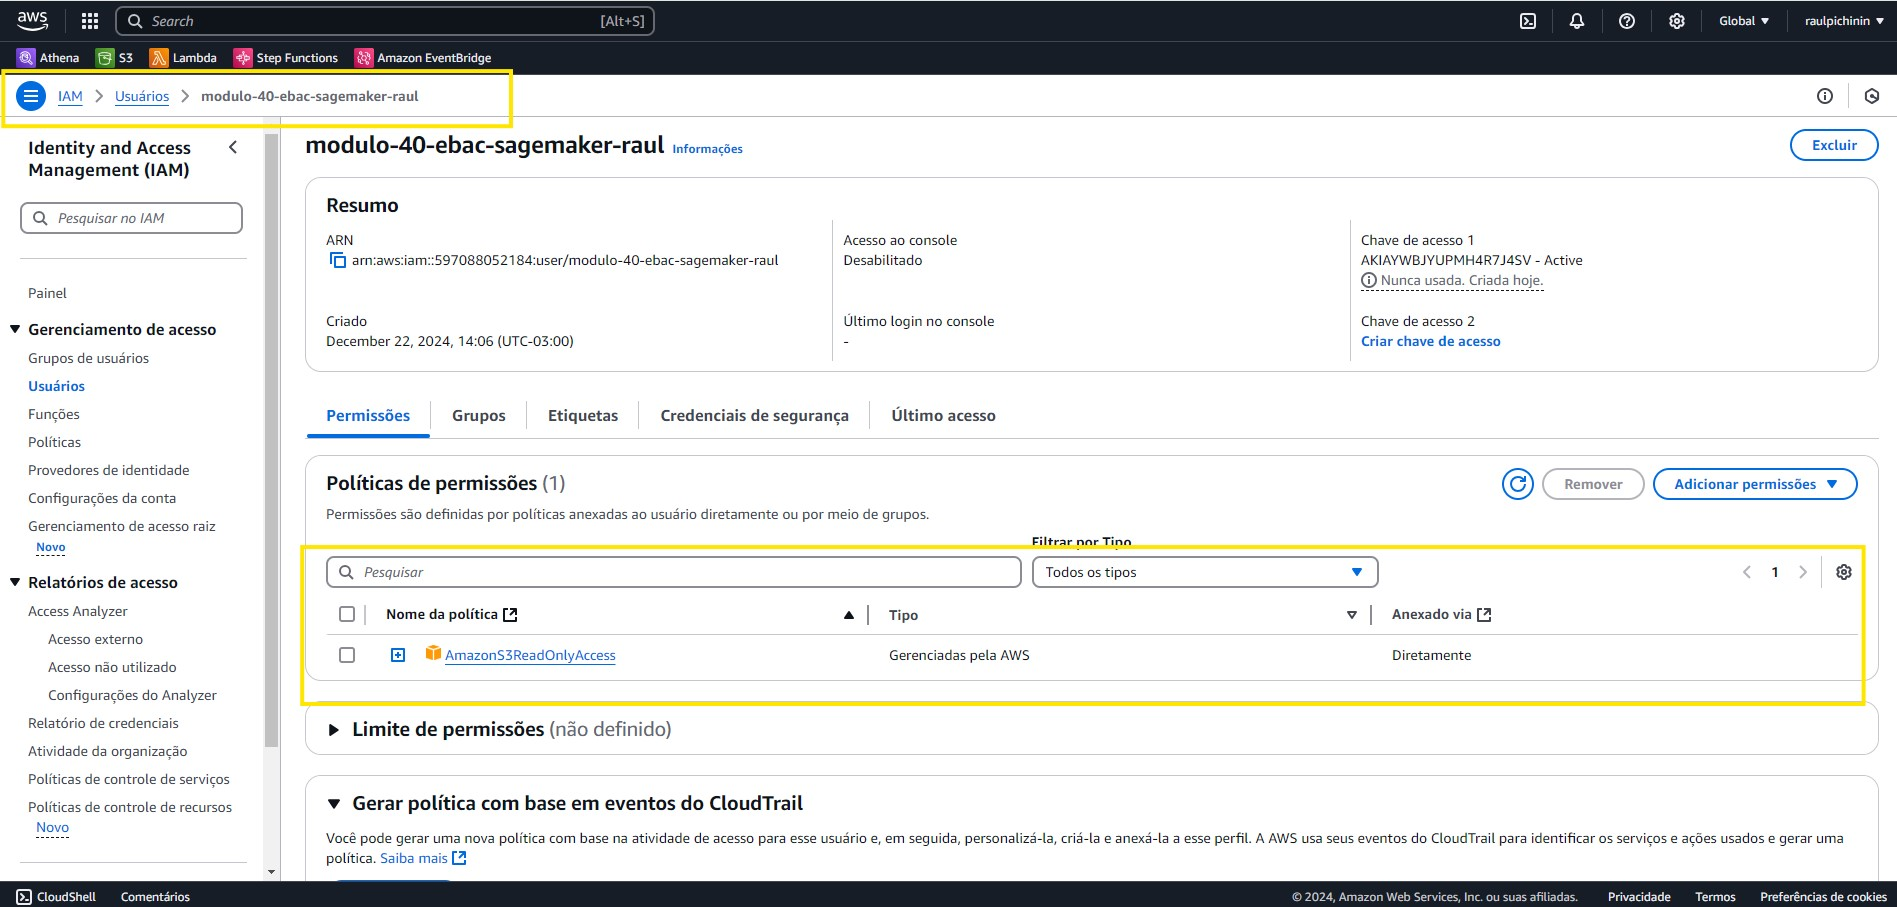

3.3- Salve a credencial em um arquivo CSV;

(em anexo)

3.4- Instale o boto3;



In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.7 MB/s eta 0:00:00


3.5- Configure as credenciais;



In [ ]:
from getpass import getpass
aws_access_key_id = getpass()

··········


In [ ]:
from getpass import getpass
aws_secret_access_key = getpass()

··········


In [ ]:
import boto3
import pandas as pd
client = boto3.client( 's3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key )

In [ ]:
BUCKET = 'modulo-40-ebac-sagemaker-raul'
client.download_file ( BUCKET, 'cotacao.csv', 'cotacao_aws.csv' )

3.6- Extraia;



In [ ]:
df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672


3.7 - Carregue;

**apresenta Erro, pois a permissão é apenas para leitura *

In [ ]:
client.upload_file( Filename='cotacao_aws.csv' , Bucket=BUCKET, Key='cotacao_aws.csv')

S3UploadFailedError: Failed to upload cotacao_aws.csv to modulo-40-ebac-sagemaker-raul/cotacao_aws.csv: An error occurred (AccessDenied) when calling the PutObject operation: User: arn:aws:iam::597088052184:user/modulo-40-ebac-sagemaker-raul is not authorized to perform: s3:PutObject on resource: "arn:aws:s3:::modulo-40-ebac-sagemaker-raul/cotacao_aws.csv" because no identity-based policy allows the s3:PutObject action